# Logistics Regression with SKLearn

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc


In [10]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [11]:

    

import requests
import io
url="https://manmohan291.s3.ap-south-1.amazonaws.com/ClassificationDS/ClassificationData.csv"
s=requests.get(url).content
dfTrain=pd.read_csv(io.StringIO(s.decode('utf-8')))

dfTrain.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Dataset ##

In [18]:
df_Features=dfTrain.iloc[:,0:2]
df_Label=dfTrain.iloc[:,2:3]

X=df_Features.values
Y=df_Label.values


### Visualize the dataset

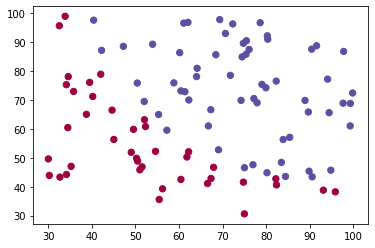

In [19]:
# Visualize the data:
plt.scatter(X[:,0].flatten().flatten(),X[:,1].flatten().flatten(), c=Y.flatten(), s=40, cmap=plt.cm.Spectral);

## Simple Logistic Regression

In [21]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV(cv=5);
clf.fit(X, Y.flatten());

## Plot the decision boundary

In [25]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:, 1].max() + 1
    h = 0.05
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=0.5)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[ :,0].flatten(), X[ :,1].flatten(), c=y.flatten(), cmap=plt.cm.Spectral)
    

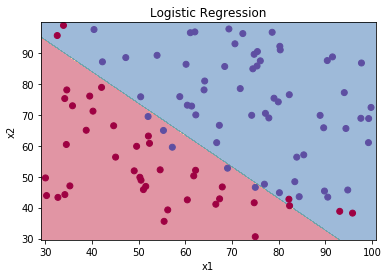

In [27]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")
LR_predictions = clf.predict(X)

